<a href="https://colab.research.google.com/github/ChaelinL/DataAnalysis_Study/blob/main/%EC%9D%B4%EC%B1%84%EB%A6%B007_0319_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석 기초반 세 번째 수업
- 결측치
- 이상치
- 누락값값

**결측치(missing value)**
- 누락된 값, 비어있는 값
- 왜 결측치가 생겼나? -> 실수로 인한 진짜 결측일 수 있고, 아닐 수도 있음.
- 결측치를 보고 그냥 넘어가기 전 데이터 분석가는 꼭 한 번 결측치 처리에 대해 고민해봐야한다.
- NA값으로 빈 값이라 할 수 있는 선택 2가지 존재.
- 1. NA 날리기: 어떤 기준으로 날릴 것인가? 기준치가 있어야 한다.
- 2. NA값 채우기: 어떻게 채울 것인가?

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'이름': ['홍길동', '김영희', '김철수'],
                   '성적':[100, 80, np.nan],
                   '등급':['A', np.nan, 'B']})
df

,이름,성적,등급
0,홍길동,100.0,A
1,김영희,80.0,NaN
2,김철수,NaN,B


In [3]:
# 결측치 확인하는 법
df.isna().sum()

이름    0
성적    1
등급    1
dtype: int64

**결측치를 제거하는 방법은?**
- df.dropna(): 결측치가 있는 행을 제거

In [7]:
df.dropna()  # 전체 모든 na값을 다 제거한다.

,이름,성적,등급
0,홍길동,100.0,A


In [12]:
df.dropna(subset=['성적'], inplace=True)  # 원본을 바꾸려면 inplace 필수 사용!
                                          # subset= 원하는 변수명을 적으면 된다.
df

,이름,성적,등급
0,홍길동,100.0,A
1,김영희,80.0,NaN


- 숫자열 데이터 타입에서 nan값은 계산이 안됨.(계산시 제외)

In [3]:
df.성적.sum()  # na값 제외하고 합쳐진다.

180.0

In [4]:
df.성적.mean()  #na값을 반영 안했음을 확인할 수 있다.

90.0

In [5]:
df.이름.value_counts().sum()

3

In [6]:
df.등급.value_counts().sum()  # 문자열 데이터, 범주형 데이터도 NAN 값 계산 안됨.

2

In [7]:
df.shape  # 전체 데이터프레임의 행과 열은 3,3이지만 실제 컬럼을 기준으로 들어가서 값을 계산할 때는 NA값을 제외한다.

(3, 3)

**exam 데이터로 예시**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

exam = pd.read_csv('/content/drive/My Drive/exam.csv')
exam

Mounted at /content/drive


,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [9]:
exam.loc[[3,8,9,15], ['english']] = np.nan  # np.nan: nan값을 na로 바꿀 때 사용

In [11]:
exam

,id,nclass,math,english,science
0,1,1,50,98.0,50
1,2,1,60,97.0,60
2,3,1,45,86.0,78
3,4,1,30,NaN,58
4,5,2,25,80.0,65
5,6,2,50,89.0,98
6,7,2,80,90.0,45
7,8,2,90,78.0,25
8,9,3,20,NaN,15
9,10,3,50,NaN,45


In [10]:
exam.isna().sum()

id         0
nclass     0
math       0
english    4
science    0
dtype: int64

In [12]:
exam.english.mean()  # 이때 평균은 na값을 반영하지 않은 것이다.

81.625

**na값을 대체하는 방법은 fillna()**
- fillna()를 사용하면 대체하는 값을 넣을 수 있다.
- 결측치에 대해서 0을 집어넣는 경우

In [13]:
exam['english'] = exam['english'].fillna(0)
exam

,id,nclass,math,english,science
0,1,1,50,98.0,50
1,2,1,60,97.0,60
2,3,1,45,86.0,78
3,4,1,30,0.0,58
4,5,2,25,80.0,65
5,6,2,50,89.0,98
6,7,2,80,90.0,45
7,8,2,90,78.0,25
8,9,3,20,0.0,15
9,10,3,50,0.0,45


In [14]:
exam.english.mean()  # na값이 0으로 대체되어 평균값이 변경되었음을 알 수 있다.

65.3

- 이러한 결측치를 대처할 때 도메인 지식과 분석가의 판단이 필요하다.
- 이 결측치를 최대한 어떻게 대체해서 머신에 학습하냐에 따라 머신러닝의 평가지표가 달라질 수 있다.

**이상치(anomaly)**
- 이상치도 진짜 정상적인 이상치일 수 있으며, 논리적으로 말도 안되는 값일 수도 있다. (ex. 고객의 장바구니 데이터에서 주문 금액이 마이너스인 경우, 반품에 해당할 수 있다.)
- 이상치도 결국 분석가가 판단을 잘 해야하는데, 이때 도메인 지식이 매우 중요하다.
- 이상치는 무엇을 기준으로 이상치로 판단하는가?
- 1. 통계적인 방법으로 IQR을 사용한다.
- 2. 분석가가 주관적으로 판단한다.

In [2]:
mpg = pd.read_csv('/content/drive/My Drive/mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [19]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

In [3]:
import seaborn as sns

<Axes: ylabel='cty'>

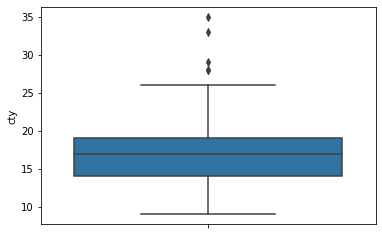

In [21]:
sns.boxplot(data=mpg, y='cty')  # 숫자형 데이터만 확인이 가능하다.

- 맨 아래 가로선: 극단치 경계
- 그 위에 |: 0~25% 내에 해당하는 값
- 상자의 밑면: 1사분위수(Q1) 하위 25%
- 상자 안의 가로선: 2사분위수(Q2) 중앙값 50%
- 상자의 윗면: 3사분위수(Q3) 하위 75%
- 상자 위 |: 75~100%에 해당하는 값
- 맨 위 가로선: 극단치 경계
- 상자 밖 점들이 극단치

**IQR 극단치 기준값 구해보기!**
- 분위수를 만들어야 함.
- quantile() 사용

In [22]:
p25 = mpg['cty'].quantile(0.25)
p25

14.0

In [23]:
p75 = mpg['cty'].quantile(0.75)
p75

19.0

In [24]:
# IQR은 1사분위수와 3사분위수의 거리를 나타낸 것
IQR = p75-p25
IQR

5.0

- Q1, Q3 이용해서 만든다.
- 아래 하한선은 p25 - 1.5*IQR
- 위의 상한선은 p75 + 1.5*IQR

In [25]:
p25-1.5*IQR  # 아래 하한선

6.5

In [26]:
p75+1.5*IQR  # 위의 상한선

26.5

In [30]:
np.where((mpg['cty']<6.5) | (mpg['cty']>26.5))  # |은 or라는 뜻

(array([ 99, 196, 212, 221, 222]),)

In [32]:
mpg['cty'] = np.where((mpg['cty']<6.5) | (mpg['cty']>26.5), np.nan, mpg['cty'])  # 위에 해당되는 값 5개를 na처리함.
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             5
hwy             0
fl              0
category        0
dtype: int64

In [34]:
mpg_1 = mpg.dropna()  # na처리한 이상치 제거
mpg_1.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

<Axes: ylabel='cty'>

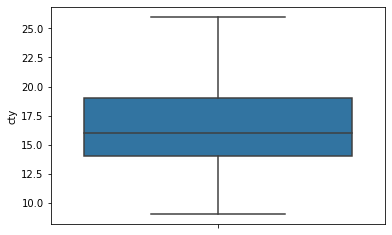

In [35]:
sns.boxplot(data=mpg_1, y='cty')  # 이상치가 제거되었음을 확인할 수 있음!

In [36]:
mpg_1.cty.mean()  # 이상치 제거 후

16.558951965065503

In [4]:
mpg.cty.mean()  # 이상치 제거 전

16.858974358974358

- 전처리를 다 진행한 후에 모델링을 진행할 때 이러한 작은 차이들이 실제 모델링에서는 큰 영향을 줄 수 있다.
- 스케일링 등의 진행을 하는 이유도 -> 데이터에 대한 편차를 최소화해서 모델에게 학습시키기 위함.